[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%204/4.5_object_detection_hub.ipynb)

## import

In [ ]:
import tensorflow as tf  # tensorflow 
import tensorflow_hub as tfhub  # tensorflow hub

## Data

344064/336122 [==============================] - 0s 0us/step


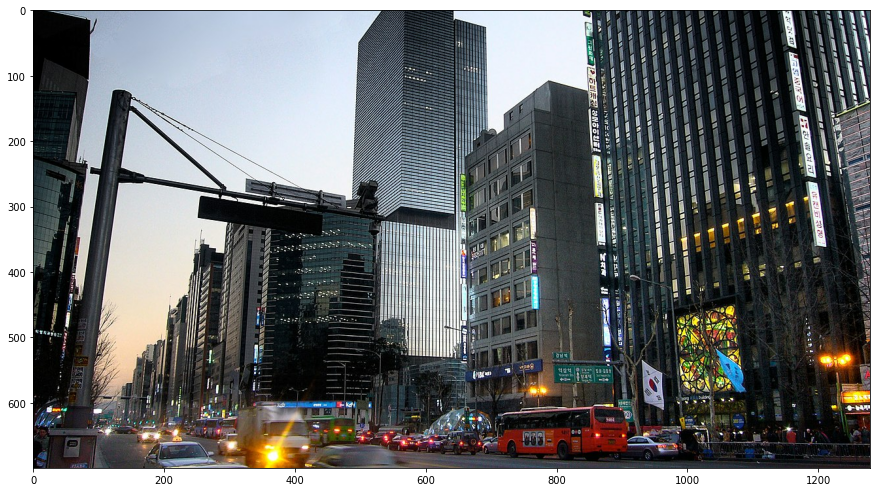

In [ ]:
# 샘플 이미지 다운로드 
img_path = 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Gangnam_Seoul_January_2009.jpg/1280px-Gangnam_Seoul_January_2009.jpg'
img = tf.keras.utils.get_file(fname='gangnam', origin=img_path)
img = tf.io.read_file(img)   # 파일 객체를 string으로 변환
img = tf.image.decode_jpeg(img, channels=3)   # 문자(string)를 숫자(unit8) 텐서로 변환
img = tf.image.convert_image_dtype(img, tf.float32)   # 0 ~ 1 범위로 정규화 

import matplotlib.pylab as plt
plt.figure(figsize=(15, 10))
plt.imshow(img)

In [ ]:
img_input = tf.expand_dims(img, 0)  # batch_size 추가
img_input.shape

TensorShape([1, 700, 1280, 3])

## Model

In [ ]:
# TensorFlow Hub에서 모델 가져오기 - FasterRCNN+InceptionResNet V2 
model = tfhub.load("https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1")

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
# 모델 시그니처(용도) 확인 
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7FD03148D450>}))

In [ ]:
# 객체탐지 모델 생성 
obj_detector = model.signatures['default']
obj_detector

<ConcreteFunction pruned(images) at 0x7FD03148D450>

In [ ]:
# 모델을 이용하여 예측 (추론)
result = obj_detector(img_input)  
result.keys()

dict_keys(['detection_scores', 'detection_class_labels', 'detection_class_entities', 'detection_class_names', 'detection_boxes'])

In [ ]:
# 탐지한 객체의 개수 
len(result["detection_scores"])

100

## 시각화

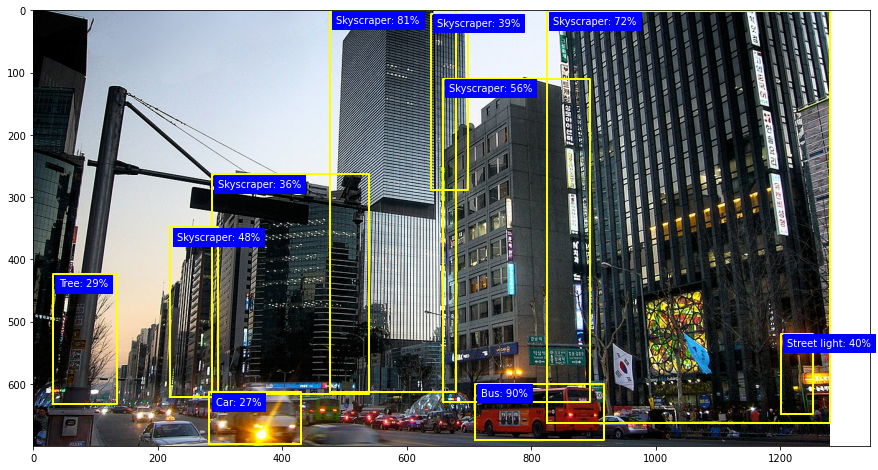

In [ ]:
# 객체 탐지 결과를 시각화
boxes = result["detection_boxes"]    # Bounding Box 좌표 예측값
labels = result["detection_class_entities"]   # 클래스 값 
scores = result["detection_scores"]   # 신뢰도 (confidence)

# 샘플 이미지 가로 세로 크기 
img_height, img_width = img.shape[0], img.shape[1]

# 탐지할 최대 객체의 수
obj_to_detect = 10

# 시각화 
plt.figure(figsize=(15, 10))
for i in range(min(obj_to_detect, boxes.shape[0])):    
    if scores[i] >= 0.2:
        (ymax, xmin, ymin, xmax) = (boxes[i][0]*img_height, boxes[i][1]*img_width,
                                    boxes[i][2]*img_height, boxes[i][3]*img_width)
                                    
        plt.imshow(img)
        plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin],
                 color='yellow', linewidth=2)
        
        class_name = labels[i].numpy().decode('utf-8')
        infer_score = int(scores[i].numpy()*100)
        annotation = "{}: {}%".format(class_name, infer_score)
        plt.text(xmin+10, ymax+20, annotation,
                 color='white', backgroundcolor='blue', fontsize=10)